In [2]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 100

# Light Level (simulated analog values from LDR, range: 0-1023)
light_level = np.random.randint(0, 1024, num_samples)

# Crowd Density (simulated distance in cm, range: 0-200)
crowd_density = np.random.randint(0, 201, num_samples)

# Temperature (simulated values in °C, range: 15-40)
temperature = np.random.uniform(15, 40, num_samples)

# Humidity (simulated values in %, range: 20-80)
humidity = np.random.uniform(20, 80, num_samples)

# Motion Detected (binary: 1 = motion detected, 0 = no motion)
# We'll simulate motion detection based on some rules:
# Motion is more likely when light level is low and crowd density is high
motion_detected = np.where(
    (light_level < 500) & (crowd_density > 100), 1, 0)

# Create a DataFrame
data = pd.DataFrame({
    "Light Level": light_level,
    "Crowd Density": crowd_density,
    "Temperature": temperature,
    "Humidity": humidity,
    "Motion Detected": motion_detected
})

# Save the synthetic data to a CSV file (optional)
data.to_csv("synthetic_fob_data.csv", index=False)

# Display the first few rows of the dataset
print(data.head())

   Light Level  Crowd Density  Temperature   Humidity  Motion Detected
0          102            190    23.108626  63.256395                1
1          435            145    18.052199  38.483648                1
2          860             43    23.907446  52.552414                0
3          270            161    37.670711  50.528845                1
4          106            189    21.803306  58.179957                1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the synthetic data
data = pd.read_csv("synthetic_fob_data.csv")

# Feature selection
X = data[["Light Level", "Crowd Density", "Temperature", "Humidity"]]  # Input features
y = data["Motion Detected"]  # Target feature

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [5]:
# Example: New synthetic data for testing
new_data = pd.DataFrame({
    "Light Level": [300, 800, 200],
    "Crowd Density": [150, 50, 180],
    "Temperature": [25, 30, 22],
    "Humidity": [60, 70, 50]
})

# Make predictions
predictions = model.predict(new_data)
print("Predictions:", predictions)

Predictions: [1 0 1]


Model Accuracy: 100.00%


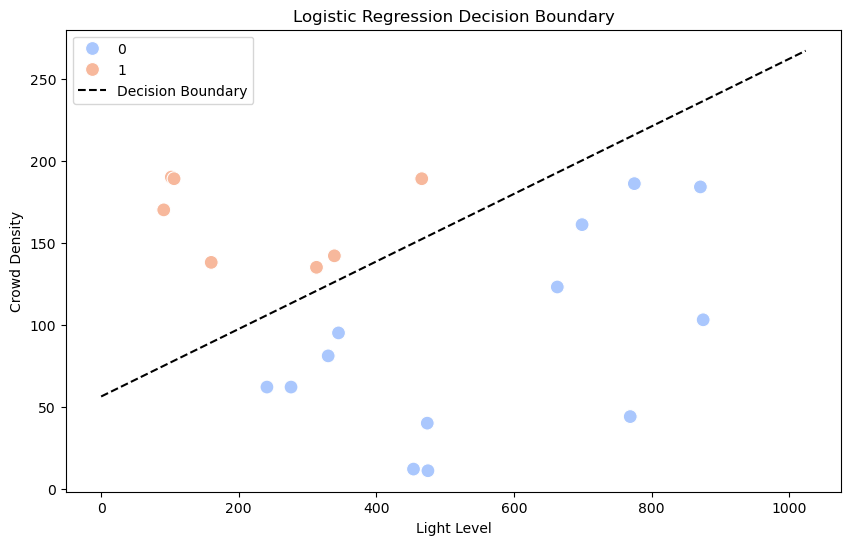

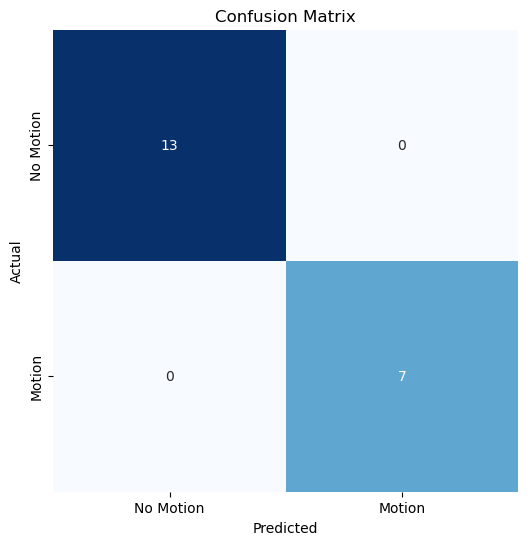

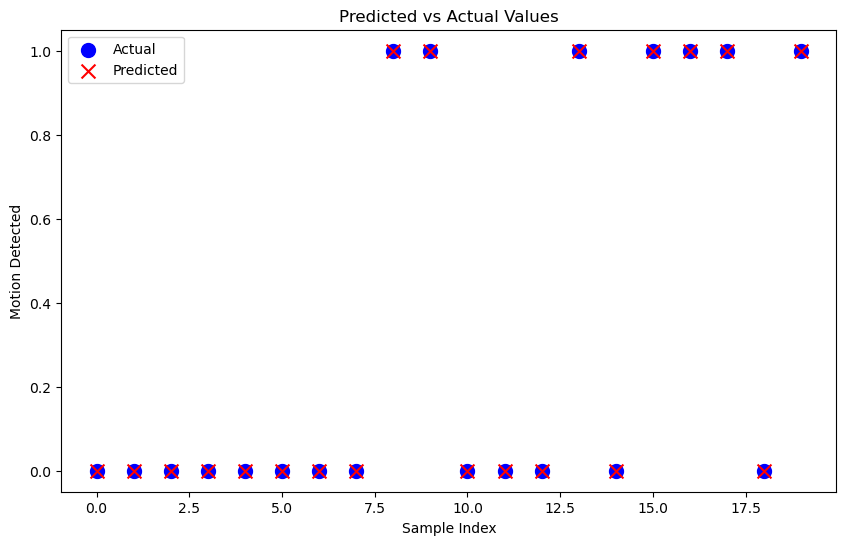

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Generate synthetic data (same as before)
np.random.seed(42)
num_samples = 100

light_level = np.random.randint(0, 1024, num_samples)
crowd_density = np.random.randint(0, 201, num_samples)
temperature = np.random.uniform(15, 40, num_samples)
humidity = np.random.uniform(20, 80, num_samples)
motion_detected = np.where((light_level < 500) & (crowd_density > 100), 1, 0)

data = pd.DataFrame({
    "Light Level": light_level,
    "Crowd Density": crowd_density,
    "Temperature": temperature,
    "Humidity": humidity,
    "Motion Detected": motion_detected
})

# Feature selection
X = data[["Light Level", "Crowd Density"]]  # Use 2 features for visualization
y = data["Motion Detected"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Visualizations

# 1. Logistic Regression Decision Boundary (for 2 features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test["Light Level"], y=X_test["Crowd Density"], hue=y_test, palette="coolwarm", s=100)

# Plot the decision boundary
coef = model.coef_[0]
intercept = model.intercept_
x_values = np.linspace(0, 1024, 100)
y_values = -(coef[0] * x_values + intercept) / coef[1]
plt.plot(x_values, y_values, color="black", linestyle="--", label="Decision Boundary")

plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Light Level")
plt.ylabel("Crowd Density")
plt.legend()
plt.show()

# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Motion", "Motion"], yticklabels=["No Motion", "Motion"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3. Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual", s=100)
plt.scatter(range(len(y_test)), y_pred, color="red", label="Predicted", s=100, marker="x")
plt.title("Predicted vs Actual Values")
plt.xlabel("Sample Index")
plt.ylabel("Motion Detected")
plt.legend()
plt.show()

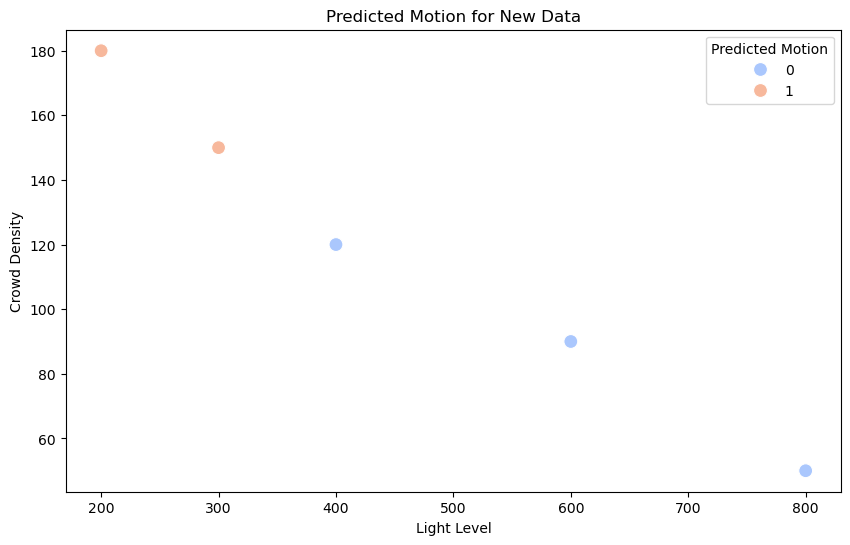

   Light Level  Crowd Density  Temperature  Humidity  Predicted Motion
0          300            150           25        60                 1
1          800             50           30        70                 0
2          200            180           22        50                 1
3          400            120           28        65                 0
4          600             90           35        75                 0


In [7]:
# Example: New synthetic data for testing
new_data = pd.DataFrame({
    "Light Level": [300, 800, 200, 400, 600],
    "Crowd Density": [150, 50, 180, 120, 90],
    "Temperature": [25, 30, 22, 28, 35],
    "Humidity": [60, 70, 50, 65, 75]
})

# Make predictions
predictions = model.predict(new_data[["Light Level", "Crowd Density"]])

# Add predictions to the new_data DataFrame
new_data["Predicted Motion"] = predictions

# Visualize the predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=new_data["Light Level"], y=new_data["Crowd Density"], hue=new_data["Predicted Motion"], palette="coolwarm", s=100)
plt.title("Predicted Motion for New Data")
plt.xlabel("Light Level")
plt.ylabel("Crowd Density")
plt.legend(title="Predicted Motion")
plt.show()

# Print the new data with predictions
print(new_data)

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
 # Train a Logistic Regression model on the training set
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (on testing set): {accuracy * 100:.2f}%")

Model Accuracy (on testing set): 100.00%


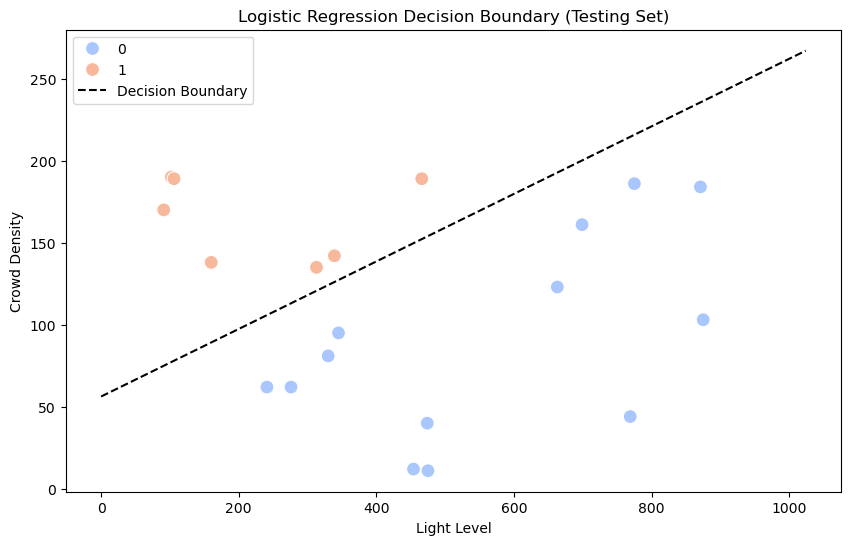

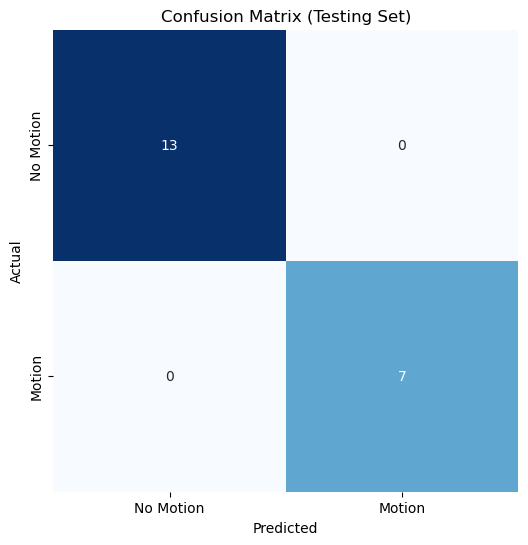

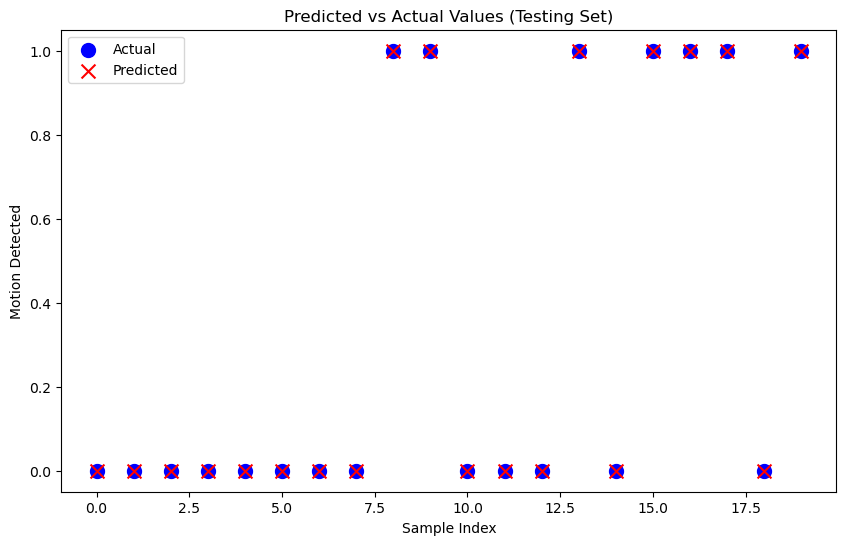

In [12]:
# 1. Logistic Regression Decision Boundary (for testing set)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test["Light Level"], y=X_test["Crowd Density"], hue=y_test, palette="coolwarm", s=100)

# Plot the decision boundary
coef = model.coef_[0]
intercept = model.intercept_
x_values = np.linspace(0, 1024, 100)
y_values = -(coef[0] * x_values + intercept) / coef[1]
plt.plot(x_values, y_values, color="black", linestyle="--", label="Decision Boundary")

plt.title("Logistic Regression Decision Boundary (Testing Set)")
plt.xlabel("Light Level")
plt.ylabel("Crowd Density")
plt.legend()
plt.show()

# 2. Confusion Matrix (for testing set)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Motion", "Motion"], yticklabels=["No Motion", "Motion"])
plt.title("Confusion Matrix (Testing Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3. Predicted vs Actual Values (for testing set)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual", s=100)
plt.scatter(range(len(y_test)), y_pred, color="red", label="Predicted", s=100, marker="x")
plt.title("Predicted vs Actual Values (Testing Set)")
plt.xlabel("Sample Index")
plt.ylabel("Motion Detected")
plt.legend()
plt.show()

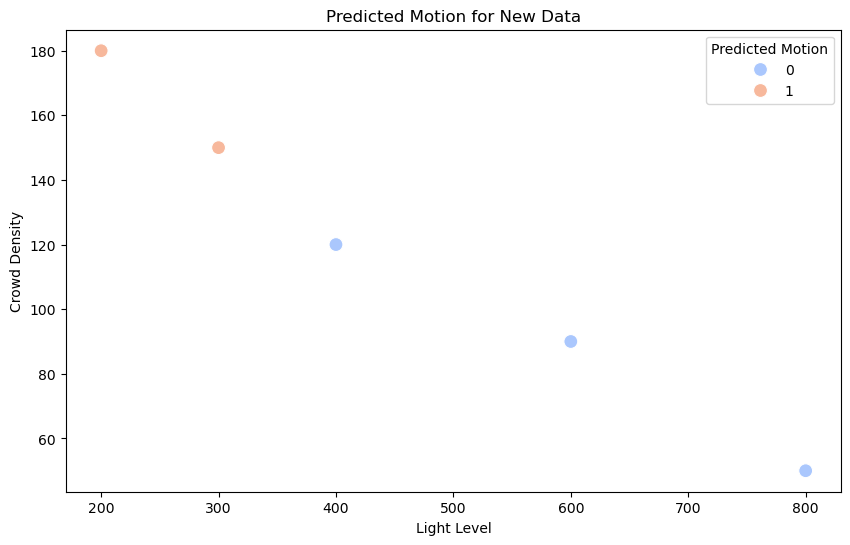

   Light Level  Crowd Density  Temperature  Humidity  Predicted Motion
0          300            150           25        60                 1
1          800             50           30        70                 0
2          200            180           22        50                 1
3          400            120           28        65                 0
4          600             90           35        75                 0


In [13]:
# Example: New synthetic data for testing
new_data = pd.DataFrame({
    "Light Level": [300, 800, 200, 400, 600],
    "Crowd Density": [150, 50, 180, 120, 90],
    "Temperature": [25, 30, 22, 28, 35],
    "Humidity": [60, 70, 50, 65, 75]
})

# Make predictions
predictions = model.predict(new_data[["Light Level", "Crowd Density"]])

# Add predictions to the new_data DataFrame
new_data["Predicted Motion"] = predictions

# Visualize the predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=new_data["Light Level"], y=new_data["Crowd Density"], hue=new_data["Predicted Motion"], palette="coolwarm", s=100)
plt.title("Predicted Motion for New Data")
plt.xlabel("Light Level")
plt.ylabel("Crowd Density")
plt.legend(title="Predicted Motion")
plt.show()

# Print the new data with predictions
print(new_data)

In [14]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 100

# Light Level (simulated analog values from LDR, range: 0-1023)
light_level = np.random.randint(0, 1024, num_samples)

# Crowd Density (simulated distance in cm, range: 0-200)
crowd_density = np.random.randint(0, 201, num_samples)

# Temperature (simulated values in °C, range: 15-40)
temperature = np.random.uniform(15, 40, num_samples)

# Humidity (simulated values in %, range: 20-80)
humidity = np.random.uniform(20, 80, num_samples)

# Motion Detected (binary: 1 = motion detected, 0 = no motion)
# Add some noise to make the data less perfectly separable
motion_detected = np.where(
    (light_level < 500) & (crowd_density > 100), 1, 0)

# Introduce noise: Randomly flip 10% of the labels
noise = np.random.choice([0, 1], size=num_samples, p=[0.9, 0.1])
motion_detected = np.where(noise == 1, 1 - motion_detected, motion_detected)

# Create a DataFrame
data = pd.DataFrame({
    "Light Level": light_level,
    "Crowd Density": crowd_density,
    "Temperature": temperature,
    "Humidity": humidity,
    "Motion Detected": motion_detected
})

# Save the synthetic data to a CSV file (optional)
data.to_csv("synthetic_fob_data.csv", index=False)

# Display the first few rows of the dataset
print(data.head())

   Light Level  Crowd Density  Temperature   Humidity  Motion Detected
0          102            190    23.108626  63.256395                1
1          435            145    18.052199  38.483648                1
2          860             43    23.907446  52.552414                0
3          270            161    37.670711  50.528845                0
4          106            189    21.803306  58.179957                1


Model Accuracy (on testing set): 85.00%


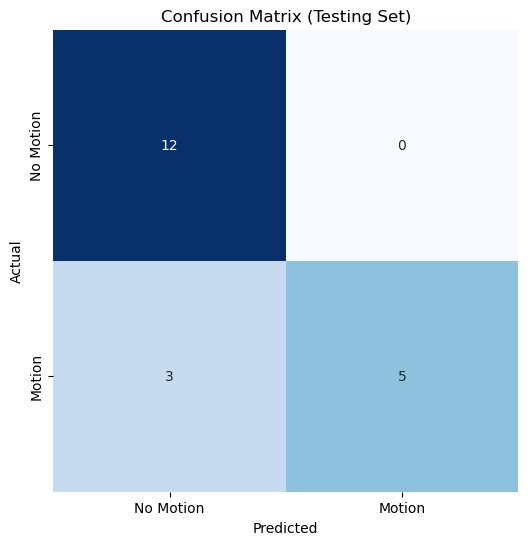

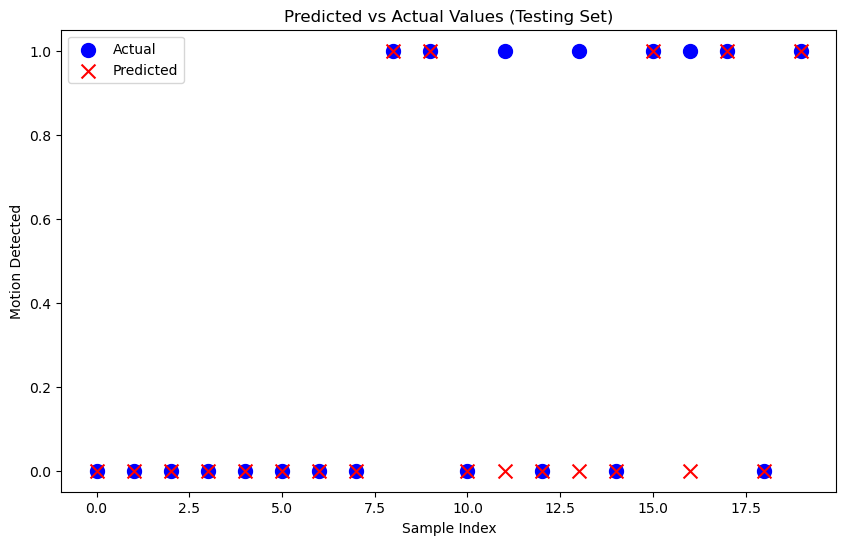

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the synthetic data
data = pd.read_csv("synthetic_fob_data.csv")

# Feature selection
X = data[["Light Level", "Crowd Density"]]  # Use 2 features for simplicity
y = data["Motion Detected"]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (on testing set): {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Motion", "Motion"], yticklabels=["No Motion", "Motion"])
plt.title("Confusion Matrix (Testing Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual", s=100)
plt.scatter(range(len(y_test)), y_pred, color="red", label="Predicted", s=100, marker="x")
plt.title("Predicted vs Actual Values (Testing Set)")
plt.xlabel("Sample Index")
plt.ylabel("Motion Detected")
plt.legend()
plt.show()

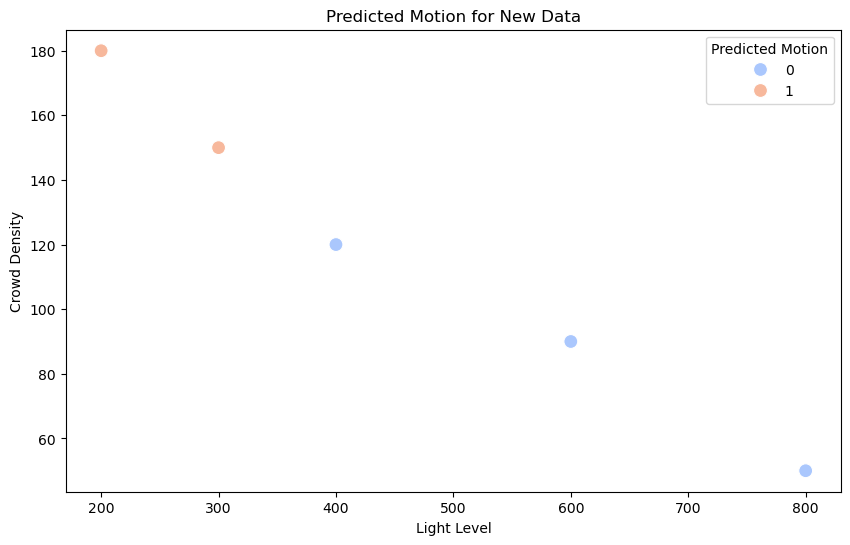

   Light Level  Crowd Density  Temperature  Humidity  Predicted Motion
0          300            150           25        60                 1
1          800             50           30        70                 0
2          200            180           22        50                 1
3          400            120           28        65                 0
4          600             90           35        75                 0


In [16]:
# Example: New synthetic data for testing
new_data = pd.DataFrame({
    "Light Level": [300, 800, 200, 400, 600],
    "Crowd Density": [150, 50, 180, 120, 90],
    "Temperature": [25, 30, 22, 28, 35],
    "Humidity": [60, 70, 50, 65, 75]
})

# Make predictions
predictions = model.predict(new_data[["Light Level", "Crowd Density"]])

# Add predictions to the new_data DataFrame
new_data["Predicted Motion"] = predictions

# Visualize the predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=new_data["Light Level"], y=new_data["Crowd Density"], hue=new_data["Predicted Motion"], palette="coolwarm", s=100)
plt.title("Predicted Motion for New Data")
plt.xlabel("Light Level")
plt.ylabel("Crowd Density")
plt.legend(title="Predicted Motion")
plt.show()

# Print the new data with predictions
print(new_data)

In [17]:
import joblib

# Save the model to a file
joblib.dump(model, "motion_detection_model.pkl")

['motion_detection_model.pkl']

In [18]:
import joblib
import numpy as np
from BlynkLib import Blynk  # Install BlynkLib: pip install BlynkLib

# Load the trained model
model = joblib.load("motion_detection_model.pkl")

# Blynk authentication
BLYNK_AUTH_TOKEN = "YourBlynkAuthToken"  # Replace with your Blynk Auth Token

# Initialize Blynk
blynk = Blynk(BLYNK_AUTH_TOKEN)

# Function to handle incoming sensor data
@blynk.on("V0")  # Virtual Pin V0 for Light Level
@blynk.on("V1")  # Virtual Pin V1 for Crowd Density
@blynk.on("V2")  # Virtual Pin V2 for Temperature
@blynk.on("V3")  # Virtual Pin V3 for Humidity
def handle_sensor_data(pin, value):
    # Store sensor data in a dictionary
    sensor_data[pin] = float(value[0])

    # If all sensor data is received, make a prediction
    if len(sensor_data) == 4:
        # Prepare input data for the model
        input_data = np.array([
            sensor_data["V0"],  # Light Level
            sensor_data["V1"],  # Crowd Density
            sensor_data["V2"],  # Temperature
            sensor_data["V3"]   # Humidity
        ]).reshape(1, -1)

        # Make a prediction
        prediction = model.predict(input_data)

        # Send the prediction back to Blynk
        blynk.virtual_write(4, int(prediction[0]))  # Virtual Pin V4 for Prediction

# Dictionary to store sensor data
sensor_data = {}

# Run Blynk
blynk.run()

ModuleNotFoundError: No module named 'BlynkLib'